### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

sns.set()

## Exploratory data analysis (EDA) of the scraped data

### Importing data in CSV files


In [2]:
df_1 = pd.read_csv("scraped_data/BOM_BLR.csv")
df_2 = pd.read_csv("scraped_data/BOM_DEL.csv")
df_3 = pd.read_csv("scraped_data/DEL_BLR.csv")
df_4 = pd.read_csv("scraped_data/DEL_BOM.csv")

In [3]:
print("Number of entries from each route\n")
print(f"df_1  ::  {df_1['Source'][0]} - {df_1['Destination'][0]} => {df_1.shape[0]} entries")
print(f"df_2  ::  {df_2['Source'][0]} - {df_2['Destination'][0]} => {df_2.shape[0]} entries")
print(f"df_3  ::  {df_3['Source'][0]} - {df_3['Destination'][0]} => {df_3.shape[0]} entries")
print(f"df_4  ::  {df_4['Source'][0]} - {df_4['Destination'][0]} => {df_4.shape[0]} entries")

Number of entries from each route

df_1  ::  BOM - BLR => 3254 entries
df_2  ::  BOM - DEL => 5772 entries
df_3  ::  DEL - BLR => 5631 entries
df_4  ::  DEL - BOM => 5346 entries


In [4]:
df_1.head()

,Airline,Source,Destination,Dep time,Arr time,Duration,Total stops,Date,Price
0,Vistara,BOM,BLR,17:30,19:15,1h45m,direct,2022-01-01,5418
1,GoFirst,BOM,BLR,06:05,07:40,1h35m,direct,2022-01-01,5100
2,GoFirst,BOM,BLR,14:35,16:10,1h35m,direct,2022-01-01,5100
3,IndiGo,BOM,BLR,08:30,10:05,1h35m,direct,2022-01-01,5103
4,IndiGo,BOM,BLR,06:55,08:30,1h35m,direct,2022-01-01,5103


### Defining functions to clean the data

In [5]:
def clean_duration(duration):
    duration = list(duration)
    duration_hours = []
    duration_mins = []

    
    for i in range(len(duration)):
            
        duration_hours.append(int(duration[i].split(sep = "h")[0]))     # Extract hours from duration
        duration_mins.append(int(duration[i].split(sep = "m")[0].split('h')[-1]))   # Extracts only minutes from duration
        

    d = []
    for i in range(len(duration)):
        d.append(duration_hours[i]*60+duration_mins[i])
        
    return d

def clean_date(date):
        date = pd.to_datetime(date)
        return date
    


In [6]:
dfs_raw = [df_1,df_2,df_3,df_4]

### Cleaning data

In [7]:
dfs = []
for df in dfs_raw:
    df.drop_duplicates() # drop duplicate rows
    df["Duration"] = clean_duration(df["Duration"]) # convert duration to numerical minutes format
    df["Date"] = clean_date(df["Date"]) # convert date to datetime format

In [8]:
df_2.tail()

,Airline,Source,Destination,Dep time,Arr time,Duration,Total stops,Date,Price
5767,SpiceJet,BOM,DEL,12.30,17.40,310,1stop,2022-01-03,29737
5768,SpiceJet,BOM,DEL,11.20,17.35,375,1stop,2022-01-03,31744
5769,SpiceJet,BOM,DEL,11.15,17.45,390,1stop,2022-01-03,31744
5770,SpiceJet,BOM,DEL,15.30,22.10,400,1stop,2022-01-03,31744
5771,SpiceJetAlaskaSeaplanes,BOM,DEL,14.55,21.15,380,1stop,2022-01-03,33122


### Keeping data of only domestic flight carriers
(Dropping data of International Flight Operators, as the fare prediction model is only of the domestic routes of Mumbai, Delhi and Banglore only.)

In [9]:
df_1= df_1.set_index("Airline")
df_1= df_1.drop([ 'AirIndiaExpressIndiGo', 'GoFirstIndiGo',
        'IndiGoAirIndia', 'IndiGoVistara',
       'VistaraIndiGo'])
df_1.reset_index(inplace = True)

In [10]:

df_2= df_2.set_index("Airline")
df_2= df_2.drop(['AirAsiaIndiaAirIndia', 'AirAsiaIndiaIndiGo', 
   'GoFirstAirAsiaIndia',
   'GoFirstIndiGo', 'GoFirstVistara', 'IndiGoAirAsiaIndia',
   'IndiGoAirIndia', 'IndiGoGoFirst', 'IndiGoSpiceJet', 'IndiGoVistara',
   'MultipleAirlines', 'SpiceJetAirAsiaIndia',
   'SpiceJetAirIndia', 'SpiceJetAlaskaSeaplanes', 'SpiceJetIndiGo',
   'SpiceJetVistara', 'SriLankanAirlines', 'VistaraGoFirst',
   'VistaraIndiGo'])
df_2.reset_index(inplace = True)

In [11]:
df_3= df_3.set_index("Airline")
df_3= df_3.drop(['AirAsiaIndiaGoFirst', 'AirAsiaIndiaIndiGo',
        'AirIndiaAirAsiaIndia',
       'AirIndiaGoFirst', 'AirIndiaIndiGo',
       'AirIndiaVistara',
       'IndiGoGoFirst', 'IndiGoSpiceJet',
       'IndiGoVistara', 'MultipleAirlines',
       'QatarAirways',
       'SpiceJetAirAsiaIndia', 'SpiceJetIndiGo',
        'VistaraGoFirst', 'VistaraIndiGo'])
df_3.reset_index(inplace = True)


In [12]:
df_4= df_4.set_index("Airline")
df_4= df_4.drop([ 'AlaskaSeaplanesSpiceJet',
       'IndiGoGoFirst', 'IndiGoVistara','SpiceJetVistara',
        'VistaraIndiGo'])
df_4.reset_index(inplace = True)



### Number of entries from each route before the data cleaning:

df_1  ::  BOM - BLR   =>   3254 entries 


df_2  ::  BOM - DEL   =>   5772 entries


df_3  ::  DEL - BLR   =>   5631 entries


df_4  ::  DEL - BOM   =>   5346 entries

### Number of entries from each route after the data cleaning:

In [13]:
print("Number of entries from each route\n")
print(f"df_1  ::  {df_1['Source'][0]} - {df_1['Destination'][0]} => {df_1.shape[0]} entries")
print(f"df_2  ::  {df_2['Source'][0]} - {df_2['Destination'][0]} => {df_2.shape[0]} entries")
print(f"df_3  ::  {df_3['Source'][0]} - {df_3['Destination'][0]} => {df_3.shape[0]} entries")
print(f"df_4  ::  {df_4['Source'][0]} - {df_4['Destination'][0]} => {df_4.shape[0]} entries")

Number of entries from each route

df_1  ::  BOM - BLR => 3191 entries
df_2  ::  BOM - DEL => 5337 entries
df_3  ::  DEL - BLR => 5254 entries
df_4  ::  DEL - BOM => 5216 entries


### Merging all dataframes

In [14]:
df = pd.DataFrame()
df = df.append(df_1, ignore_index=True)
df = df.append(df_2, ignore_index=True)
df = df.append(df_3, ignore_index=True)
df = df.append(df_4, ignore_index=True)
df.head()

,Airline,Source,Destination,Dep time,Arr time,Duration,Total stops,Date,Price
0,Vistara,BOM,BLR,17:30,19:15,105,direct,2022-01-01,5418
1,GoFirst,BOM,BLR,06:05,07:40,95,direct,2022-01-01,5100
2,GoFirst,BOM,BLR,14:35,16:10,95,direct,2022-01-01,5100
3,IndiGo,BOM,BLR,08:30,10:05,95,direct,2022-01-01,5103
4,IndiGo,BOM,BLR,06:55,08:30,95,direct,2022-01-01,5103


### Getting each data in right format

In [15]:
df.replace({"direct":0,"1stop":1, "2stops":2}, inplace=True)

In [16]:
df["Total stops"]=df["Total stops"].astype(int)

In [17]:

df["Journey_day"]= pd.to_datetime(df["Date"], format = "%d/%m/%Y").dt.day
df["Journey_month"]= pd.to_datetime(df["Date"], format = "%d/%m/%Y").dt.month
df["dep_hour"]= pd.to_datetime(df["Dep time"]).dt.hour
df["dep_min"]= pd.to_datetime(df["Dep time"]).dt.minute
df["arr_hour"]= pd.to_datetime(df["Arr time"]).dt.hour
df["arr_min"]= pd.to_datetime(df["Arr time"]).dt.minute

df.drop(["Date", "Dep time", "Arr time"], axis=1, inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Duration,Total stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,Vistara,BOM,BLR,105,0,5418,1,1,17,30,19,15
1,GoFirst,BOM,BLR,95,0,5100,1,1,6,5,7,40
2,GoFirst,BOM,BLR,95,0,5100,1,1,14,35,16,10
3,IndiGo,BOM,BLR,95,0,5103,1,1,8,30,10,5
4,IndiGo,BOM,BLR,95,0,5103,1,1,6,55,8,30


In [19]:
df["Airline"].value_counts()

Vistara            5413
IndiGo             5409
GoFirst            3485
SpiceJet           1628
AirAsiaIndia       1560
AirIndia           1342
AlaskaSeaplanes      93
flydubai             35
Emirates             33
Name: Airline, dtype: int64

### Categorical encoding

In [20]:
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_AirIndia,Airline_AlaskaSeaplanes,Airline_Emirates,Airline_GoFirst,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Airline_flydubai
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0


In [21]:
Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_DEL
0,0
1,0
2,0
3,0
4,0


In [22]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_BOM,Destination_DEL
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [23]:
finaldf= pd.concat([df, Airline, Source, Destination], axis=1)

### Merging all to get one final dataframe

In [24]:
finaldf.drop(["Airline", "Source", "Destination"],axis=1, inplace= True)

In [25]:
finaldf.head()

,Duration,Total stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,Airline_AirIndia,Airline_AlaskaSeaplanes,Airline_Emirates,Airline_GoFirst,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Airline_flydubai,Source_DEL,Destination_BOM,Destination_DEL
0,105,0,5418,1,1,17,30,19,15,0,0,0,0,0,0,1,0,0,0,0
1,95,0,5100,1,1,6,5,7,40,0,0,0,1,0,0,0,0,0,0,0
2,95,0,5100,1,1,14,35,16,10,0,0,0,1,0,0,0,0,0,0,0
3,95,0,5103,1,1,8,30,10,5,0,0,0,0,1,0,0,0,0,0,0
4,95,0,5103,1,1,6,55,8,30,0,0,0,0,1,0,0,0,0,0,0


In [26]:
finaldf.shape

(18998, 20)

In [27]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18998 entries, 0 to 18997
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Duration                 18998 non-null  int64
 1   Total stops              18998 non-null  int32
 2   Price                    18998 non-null  int64
 3   Journey_day              18998 non-null  int64
 4   Journey_month            18998 non-null  int64
 5   dep_hour                 18998 non-null  int64
 6   dep_min                  18998 non-null  int64
 7   arr_hour                 18998 non-null  int64
 8   arr_min                  18998 non-null  int64
 9   Airline_AirIndia         18998 non-null  uint8
 10  Airline_AlaskaSeaplanes  18998 non-null  uint8
 11  Airline_Emirates         18998 non-null  uint8
 12  Airline_GoFirst          18998 non-null  uint8
 13  Airline_IndiGo           18998 non-null  uint8
 14  Airline_SpiceJet         18998 non-null  uint8
 15  Ai

In [28]:
df.head()

,Airline,Source,Destination,Duration,Total stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,Vistara,BOM,BLR,105,0,5418,1,1,17,30,19,15
1,GoFirst,BOM,BLR,95,0,5100,1,1,6,5,7,40
2,GoFirst,BOM,BLR,95,0,5100,1,1,14,35,16,10
3,IndiGo,BOM,BLR,95,0,5103,1,1,8,30,10,5
4,IndiGo,BOM,BLR,95,0,5103,1,1,6,55,8,30


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18998 entries, 0 to 18997
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        18998 non-null  object
 1   Source         18998 non-null  object
 2   Destination    18998 non-null  object
 3   Duration       18998 non-null  int64 
 4   Total stops    18998 non-null  int32 
 5   Price          18998 non-null  int64 
 6   Journey_day    18998 non-null  int64 
 7   Journey_month  18998 non-null  int64 
 8   dep_hour       18998 non-null  int64 
 9   dep_min        18998 non-null  int64 
 10  arr_hour       18998 non-null  int64 
 11  arr_min        18998 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 1.7+ MB


In [30]:
finaldf.columns

Index(['Duration', 'Total stops', 'Price', 'Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arr_hour', 'arr_min', 'Airline_AirIndia',
       'Airline_AlaskaSeaplanes', 'Airline_Emirates', 'Airline_GoFirst',
       'Airline_IndiGo', 'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_flydubai', 'Source_DEL', 'Destination_BOM', 'Destination_DEL'],
      dtype='object')

In [31]:
X = finaldf.loc[:, ['Duration', 'Total stops', 'Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arr_hour', 'arr_min', 'Airline_AirIndia',
       'Airline_AlaskaSeaplanes', 'Airline_Emirates', 'Airline_GoFirst',
       'Airline_IndiGo', 'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_flydubai', 'Source_DEL', 'Destination_BOM', 'Destination_DEL']]
X.head()  #no price here

,Duration,Total stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,Airline_AirIndia,Airline_AlaskaSeaplanes,Airline_Emirates,Airline_GoFirst,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Airline_flydubai,Source_DEL,Destination_BOM,Destination_DEL
0,105,0,1,1,17,30,19,15,0,0,0,0,0,0,1,0,0,0,0
1,95,0,1,1,6,5,7,40,0,0,0,1,0,0,0,0,0,0,0
2,95,0,1,1,14,35,16,10,0,0,0,1,0,0,0,0,0,0,0
3,95,0,1,1,8,30,10,5,0,0,0,0,1,0,0,0,0,0,0
4,95,0,1,1,6,55,8,30,0,0,0,0,1,0,0,0,0,0,0


In [32]:
y= finaldf.iloc[:, 2]
y.head()    #price (target feature)

0    5418
1    5100
2    5100
3    5103
4    5103
Name: Price, dtype: int64

### Heatmap for data visualisation

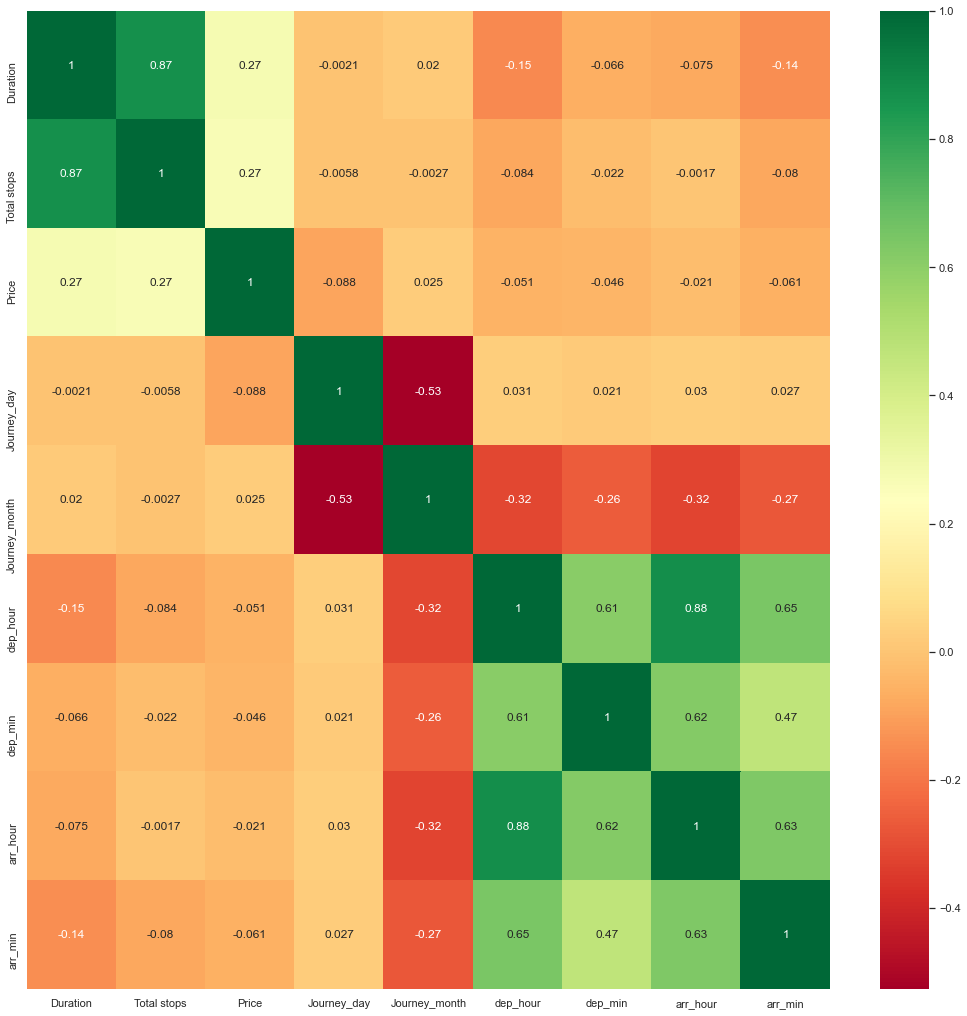

In [33]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [35]:
print(selection.feature_importances_)

[0.15961989 0.12507071 0.07017852 0.0540646  0.01609722 0.00387512
 0.01210351 0.00506845 0.00131206 0.0292262  0.22440325 0.00137001
 0.00812151 0.20088829 0.00325524 0.06204814 0.00978209 0.00541093
 0.00810426]


### Feature importance plot

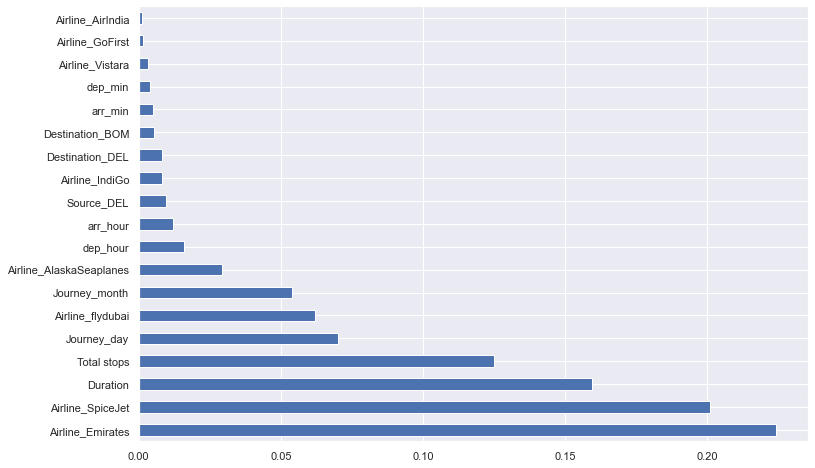

In [36]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Splitting train and test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn import metrics

### Applying RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
y_pred = reg_rf.predict(X_test)

In [41]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_test, y_test)}')
    print("MAE " , metrics.mean_absolute_error(y_test, y_pred))
    print("MSE " , metrics.mean_squared_error(y_test, y_pred))
    print("RMSE " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [42]:
get_metrics(reg_rf)

Train score 0.9559392808319689
Val score 0.834884516811241
MAE  854.957061504943
MSE  7324399.10718743
RMSE  2706.362707987869


### Test score rounds to 0.84

C:\Users\anwesh.gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


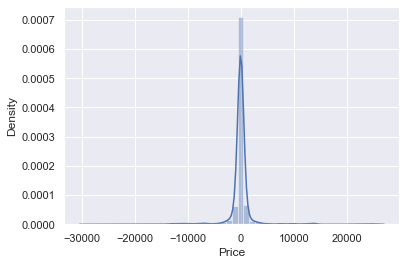

In [43]:
sns.distplot(y_test-y_pred)
plt.show()

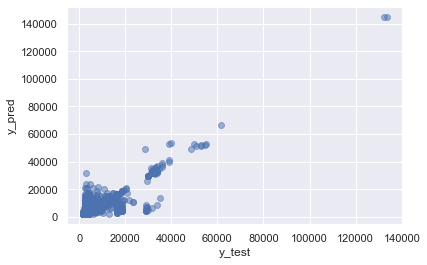

In [44]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Hyperparametric Tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
n_estimators= [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features=['auto', 'sqrt']
max_depth= [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split= [2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [47]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [48]:
rf_random= RandomizedSearchCV(cv=5,
                   estimator=reg_rf, n_iter=10, n_jobs=1,
                   param_distributions = random_grid,
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  17.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  16.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  19.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  17.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  32.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 22.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [51]:
prediction = rf_random.predict(X_test)

C:\Users\anwesh.gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


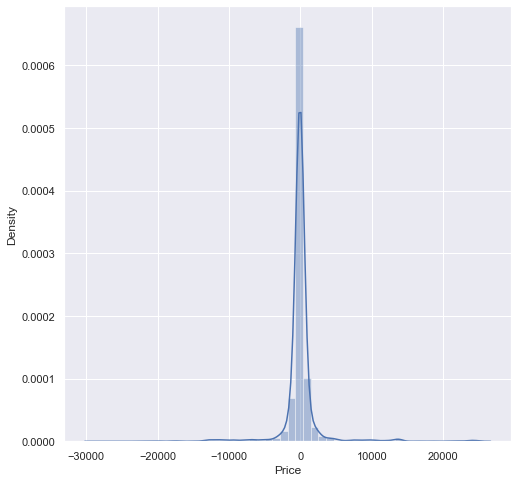

In [52]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

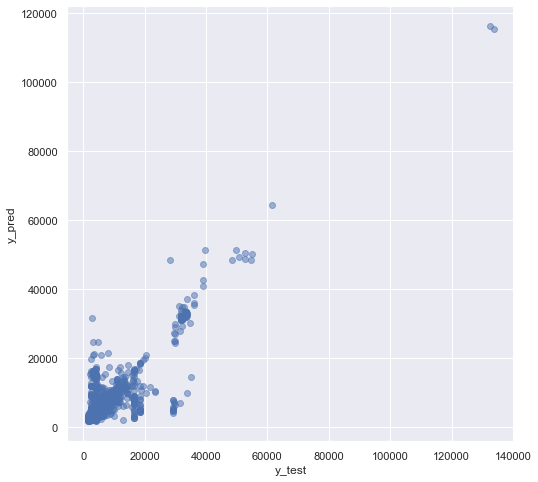

In [53]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, prediction, alpha=0.5 )
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [54]:
print('MSE ', metrics.mean_squared_error(y_test, prediction))
print('MAE ', metrics.mean_absolute_error(y_test, prediction))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MSE  7562818.311357164
MAE  945.9877207128031
RMSE  2750.057874183226


In [55]:
metrics.r2_score(y_test, prediction)

0.8295097821030608

### Tuning didnt improve the model hence score -

In [56]:
reg_rf.score(X_test, y_test)

0.834884516811241

In [57]:
test_df = pd.DataFrame({
    "Predicted Price" : y_pred,
    "Actual Price" : y_test,
    
}).reset_index(drop = True)

test_df

,Predicted Price,Actual Price
0,4401.080000,4458
1,5369.012333,5921
2,6311.840000,6923
3,10352.500000,9128
4,3987.237183,3784
...,...,...
3795,5587.360000,5596
3796,3844.180000,3831
3797,2422.509000,2012
3798,2484.040000,2454
